# Work 5



Due to your immense help, your friend startup successfully got seed funding and it is on the operational mode. Now your friend wants to expand his startup and he is looking for new investors for his startup. Now you again come as a saviour to help your friend and want to create a list of probable new new investors. Before moving forward you remember your investor friend advice that finding the investors by analysing the investment type. Since your friend startup is not in early phase it is in growth stage so the best-suited investment type is Private Equity. Find the top 5 investors who have invested in a different number of startups and their investment type is Private Equity. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column.There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import operator

In [2]:
path = 'C:/Users/91958/Desktop/nyadata/startup_funding.csv'

In [3]:
df = pd.read_csv(path)

In [4]:
test5 = df.copy()

In [5]:
# Checking to see top elements in Investors index

temp = test5['InvestorsName'].value_counts()
temp.index

Index(['Undisclosed Investors', 'Undisclosed investors',
       'Indian Angel Network', 'Ratan Tata', 'Kalaari Capital',
       'Group of Angel Investors', 'Sequoia Capital', 'undisclosed investors',
       'Brand Capital', 'Undisclosed Investor',
       ...
       'StartupXseed Ventures, The Phoenix Fund and others',
       'NTT Finance, Telephone Corporation', 'Myntra/LivSpace Founders',
       'HDFC, Faering Capital, Elevate Sports',
       'Mato Peric, Peter Kabel & others', 'Oranda Global & Others',
       'GEMs Advisory, Quarizon', 'Purvi Ventures, Rajul Garg, Vipin Arora',
       'Mirah Hospitality',
       'Subramani Somasundaram, Sundeep Sahni, Mayank Mittal & Others'],
      dtype='object', length=1885)

In [6]:
#correcting the spelling in investors name ignoring undisclosed investors

test5['InvestorsName'].replace("Undisclosed investors", "Undisclosed Investors", inplace = True)
test5['InvestorsName'].replace("Undisclosed Investors","",inplace = True)

In [7]:
# Checking to see top elements in Startup Name

temp3 = test5['StartupName'].value_counts()
temp3.index

Index(['Swiggy', 'UrbanClap', 'Paytm', 'Jugnoo', 'Medinfi', 'NoBroker',
       'Tracxn', 'TinyStep', 'Ola', 'Capital Float',
       ...
       'ICustomMadeIt', 'AskMyGift', 'Room on Call', 'Shadowfox',
       'Little Black Book', 'Instaproc', 'Chaayos', 'Indix', 'Wealthy',
       'DailyNinja'],
      dtype='object', length=2001)

In [8]:
#correcting major startup names

test5['StartupName'].replace("Ola Cabs", "Ola", inplace = True)
test5['StartupName'].replace("OyoRooms", "Oyo", inplace = True)
test5['StartupName'].replace("Oyorooms", "Oyo", inplace = True)
test5['StartupName'].replace("OYO Rooms", "Oyo", inplace = True)
test5['StartupName'].replace("Olacabs", "Ola", inplace = True)
test5['StartupName'].replace("Flipkart.com", "Flipkart", inplace = True)
test5['StartupName'].replace("Oyo Rooms", "Oyo", inplace = True)
test5['StartupName'].replace("Paytm Marketplace", "Paytm", inplace = True)

In [9]:
# Checking to see top elements in Investment Type

temp3a = test5['InvestmentType'].value_counts()
temp3a.index

Index(['Seed Funding', 'Private Equity', 'SeedFunding', 'Crowd Funding',
       'Crowd funding', 'PrivateEquity', 'Debt Funding'],
      dtype='object')

In [10]:
#correcting spelling of investment type

test5['InvestmentType'].replace("PrivateEquity","Private Equity", inplace = True)
test5['InvestmentType'].replace("SeedFunding","Seed Funding", inplace = True)
test5['InvestmentType'].replace("Crowd funding","Crowd Funding", inplace = True)

In [11]:
#filter na 

test5.dropna(inplace = True, subset = ["InvestorsName", "StartupName", "InvestmentType"])
test5.reset_index(inplace = True, drop = True)

# Main Funtion

In [12]:
def create(startup_name, Investor_Name, Investment_Type,Desired_Investment_Type):
    cnt = {}
    name_startup = {}
    
    n = len(Investor_Name)
    for index in range(n):
        
        if Investment_Type[index].strip() not in Desired_Investment_Type:
            continue
            
        i = Investor_Name[index].strip()
        name = startup_name[index].strip()
        
        if "," not in i and i!='':
            if name_startup.get(i) is None:
                cnt[i] = 1
                li =[]
                li.append(name)
                name_startup[i] = li
                
            else:
                li = name_startup[i]
                if name not in li:
                    cnt[i] = cnt.get(i,0) + 1
                    li.append(name)
                    name_startup[i] = li
        else:
            string = i.strip().split(',')
            for j in string:
                k = j.strip()
                if k != '':
                    
                    if name_startup.get(k) is None:
                        cnt[k] = 1
                        li =[]
                        li.append(name)
                        name_startup[k] = li
                
                    else:
                        li = name_startup[k]
                        if name not in li:
                            cnt[k] = cnt.get(k,0) + 1
                            li.append(name)
                            name_startup[k] = li

                
    return cnt

In [13]:
dictionary = create(test5['StartupName'],test5['InvestorsName'],test5['InvestmentType'],["Private Equity"]) 

In [14]:
different_invest = pd.DataFrame(list(dictionary.values()),list(dictionary.keys()))

In [15]:
different_invest = different_invest.sort_values(by = [0], ascending = False)
different_invest

,0
Sequoia Capital,45
Accel Partners,43
Kalaari Capital,35
Blume Ventures,27
SAIF Partners,24
...,...
BlackSoil Capital Pvt. Ltd.,1
Scadea Solutions Inc,1
Lightbox Ventures and others,1
Goldman Sachs Group,1


In [16]:
x = []
y = []
#we have to just find top 5 Investors
for i in range(5):
    x.append(different_invest.index[i])
    y.append(different_invest.values[i][0])
y    

[45, 43, 35, 27, 24]

In [17]:
x

['Sequoia Capital',
 'Accel Partners',
 'Kalaari Capital',
 'Blume Ventures',
 'SAIF Partners']

In [18]:
#printing the top investors who invested who invested most number of times in different startups and Investment type is either Seed funding or Crowd funding
print("List Of Top 5 Investors who Invested most number of times of type Seed funding or Crowd funding :")
i = 0
for ele in x:
    print(i+1,end = "")
    print(".", end = " ")
    print(ele)
    i += 1

List Of Top 5 Investors who Invested most number of times of type Seed funding or Crowd funding :
1. Sequoia Capital
2. Accel Partners
3. Kalaari Capital
4. Blume Ventures
5. SAIF Partners


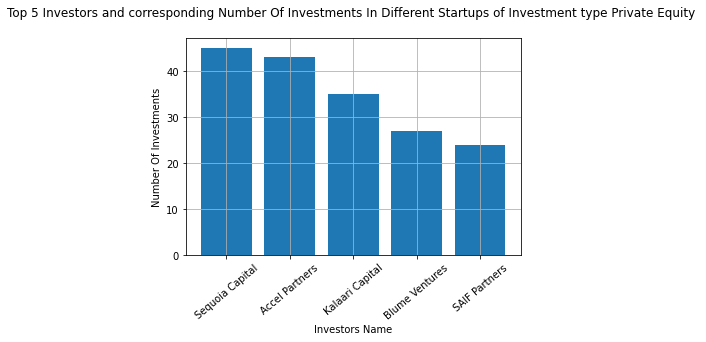

In [19]:
#plot

plt.bar(x, y)
plt.grid()
plt.xlabel("Investors Name")
plt.ylabel("Number Of Investments")
plt.xticks(rotation=40)
plt.title("Top 5 Investors and corresponding Number Of Investments In Different Startups of Investment type Private Equity \n")
plt.show()

In [20]:
#pandas frame for Investors name and corresponding Number of Investments made by them in different startups and Investment type is either Seed funding or Crowd funding

li = list(zip(x,y))
investor_data = pd.DataFrame(li, columns = ["Name Of Investors", "Total Number Of Investments of type Seed funding or Crowd funding"])
investor_data

,Name Of Investors,Total Number Of Investments of type Seed funding or Crowd funding
0,Sequoia Capital,45
1,Accel Partners,43
2,Kalaari Capital,35
3,Blume Ventures,27
4,SAIF Partners,24


# Pie Chart 

to find the difference betwwen seed funding vs private quity

In [21]:
test5['InvestmentType'].replace("Crowd Funding", "Others", inplace = True)
test5['InvestmentType'].replace("Debt Funding", "Others", inplace = True)

In [22]:
 #extracting the cities and their counts
temp = test5['InvestmentType'].value_counts()
inv_type = temp.index
inv_type

Index(['Seed Funding', 'Private Equity', 'Others'], dtype='object')

In [23]:
No_Of_Funding = temp.values
No_Of_Funding

array([1294, 1066,    3], dtype=int64)

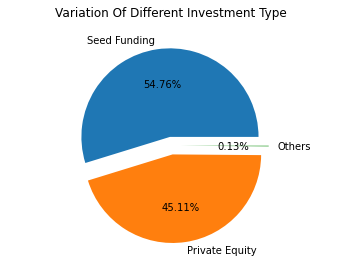

In [26]:

plt.title("Variation Of Different Investment Type  \n")
plt.pie(No_Of_Funding,labels = inv_type , explode = [0.1,0.1,0.1] , autopct="%.2f%%",  startangle=0, counterclock = True)
plt.axis("equal")
plt.show()